In [1]:
import numpy as np
import pandas as pd
import matplotlib as mtlb
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('Pinq.csv')

In [3]:
dataset.head()

,Timestamp,What is your name?,What is your email address? (optional),What is your age?,What is your mobile number?,What is your gender?,what is your location?,What is your Annual Income? (Optional),Education,Where did you hear about us?,...,If 'yes'; Which one is your favourite?,Rate our cocktails?,Have you tried our 'dine in'?,Rate our food (If 'Yes'),Have you tried our Shisha?,Rate our Shisha,Rate our waiting staff?,Rate the environment?,Describe us in 4 words?,Recommendations
0,2022/06/07 8:41:39 PM GMT+1,Alessandro,NaN,20.0,NaN,Male,North London,5000-25000 GBP,Under-graduate,Tik Tok,...,Amaretti Sour,7.0,No,NaN,No,6.0,7.0,8,A pretty decent restaurant,Great food
1,2022/06/07 8:42:37 PM GMT+1,Semih,NaN,19.0,NaN,Male,North London,5000-25000 GBP,Under-graduate,Tik Tok,...,Passion Fruit Martini,0.0,No,NaN,No,NaN,8.0,8,Tasty restaurant,NaN
2,2022/06/07 8:43:33 PM GMT+1,Robert,NaN,20.0,NaN,Male,West London,5000-25000 GBP,Under-graduate,Facebook,...,Sex on the beach,8.0,Yes,7.0,No,7.0,8.0,8,Good,Yes
3,2022/06/07 8:43:44 PM GMT+1,Sebastian,NaN,20.0,NaN,Male,North London,5000-25000 GBP,Under-graduate,Word of mouth,...,NaN,NaN,Yes,9.0,No,5.0,10.0,9,"Clean, great food, good environment",NaN
4,2022/06/07 8:47:05 PM GMT+1,Hidaya Jordan,NaN,21.0,NaN,Female,West London,25000-45000 GBP,Under-graduate,Instagram,...,Sex on the beach,10.0,Yes,10.0,Yes,10.0,10.0,10,NaN,NaN


In [4]:
dataset.columns=['Timestamps','Name','email','Age','Mobile_number','Gender','Location','Income','Education','Social_media','Out_coacktails','Out_shishsa','Out_food','Pinq_member','Pinq_visit','Tried_cocktails','Favourite_cocktail','Cocktails_rating','Dine_in','Food_rating','Shisha_tried','Shisha_rating','Waiting_staff_rating','Environment_rating','4_words','Recommendations']

In [5]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

Name 0.0376  % missing values
email 0.5376  % missing values
Mobile_number 0.0753  % missing values
Favourite_cocktail 0.1989  % missing values
Cocktails_rating 0.1505  % missing values
Food_rating 0.1667  % missing values
Shisha_rating 0.0376  % missing values
Waiting_staff_rating 0.0161  % missing values
4_words 0.0161  % missing values
Recommendations 0.1075  % missing values


In [6]:
dataset.describe()

,Age,Cocktails_rating,Food_rating,Shisha_rating,Waiting_staff_rating,Environment_rating
count,185.000000,158.000000,155.000000,179.000000,183.000000,186.000000
mean,25.059459,7.727848,8.193548,6.726257,9.306011,9.177419
std,5.752290,2.550506,1.754759,3.465388,1.187997,1.206167
min,15.000000,0.000000,1.000000,1.000000,2.000000,4.000000
25%,21.000000,6.000000,7.000000,5.000000,9.000000,9.000000
50%,24.000000,8.000000,8.000000,8.000000,10.000000,10.000000
75%,28.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,45.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [7]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

In [8]:
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  6


In [9]:
dataset[numerical_features].head()

,Age,Cocktails_rating,Food_rating,Shisha_rating,Waiting_staff_rating,Environment_rating
0,20.0,7.0,NaN,6.0,7.0,8
1,19.0,0.0,NaN,NaN,8.0,8
2,20.0,8.0,7.0,7.0,8.0,8
3,20.0,NaN,9.0,5.0,10.0,9
4,21.0,10.0,10.0,10.0,10.0,10


In [10]:
dataset["Food_rating"].fillna(dataset["Food_rating"].mean(), inplace=True)

In [11]:
dataset["Cocktails_rating"].fillna(dataset["Cocktails_rating"].mean(), inplace=True)
dataset["Shisha_rating"].fillna(dataset["Shisha_rating"].mean(), inplace=True)
dataset["Waiting_staff_rating"].fillna(dataset["Waiting_staff_rating"].mean(), inplace=True)
dataset["Environment_rating"].fillna(dataset["Environment_rating"].mean(), inplace=True)

In [12]:
dataset['Environment_rating']=dataset['Environment_rating'].round(0)
dataset['Waiting_staff_rating']=dataset['Waiting_staff_rating'].round(0)
dataset['Shisha_rating']=dataset['Shisha_rating'].round(0)
dataset['Cocktails_rating']=dataset['Cocktails_rating'].round(0)
dataset[numerical_features].head()

,Age,Cocktails_rating,Food_rating,Shisha_rating,Waiting_staff_rating,Environment_rating
0,20.0,7.0,8.193548,6.0,7.0,8
1,19.0,0.0,8.193548,7.0,8.0,8
2,20.0,8.0,7.000000,7.0,8.0,8
3,20.0,8.0,9.000000,5.0,10.0,9
4,21.0,10.0,10.000000,10.0,10.0,10


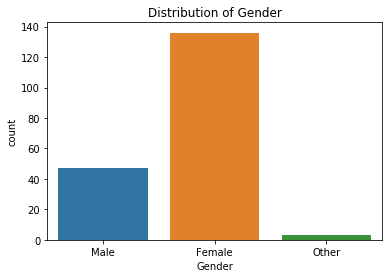

In [13]:
sns.countplot(x='Gender', data=dataset);
plt.title('Distribution of Gender');

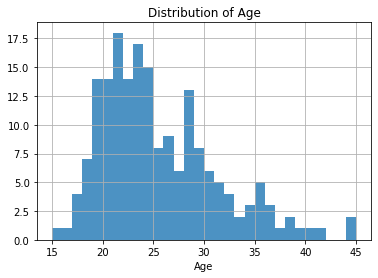

In [14]:
dataset.hist('Age', bins=30, alpha=0.8);
plt.title('Distribution of Age');
plt.xlabel('Age');

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


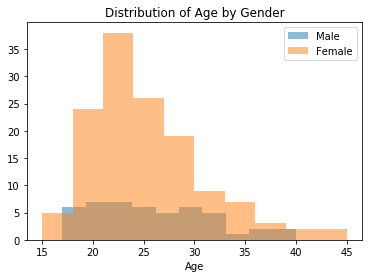

In [15]:
plt.hist('Age', data=dataset[dataset['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=dataset[dataset['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

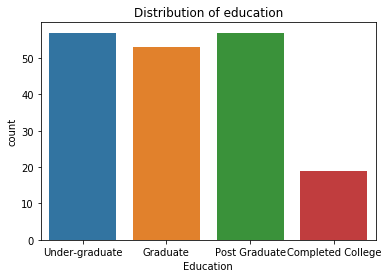

In [16]:
sns.countplot('Education',data=dataset);
plt.xlabel('Education');
plt.title('Distribution of education');

Text(0.5, 1.0, 'Distribution of education')

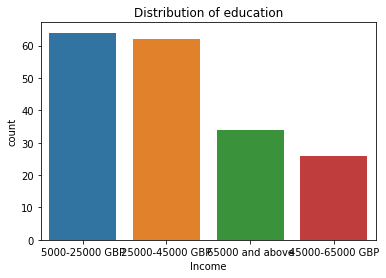

In [17]:
sns.countplot('Income',data=dataset);
plt.xlabel('Income');
plt.title('Distribution of education')

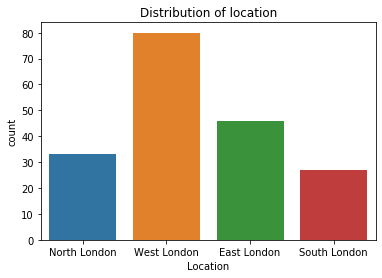

In [18]:
sns.countplot('Location',data=dataset);
plt.xlabel('Location');
plt.title('Distribution of location');

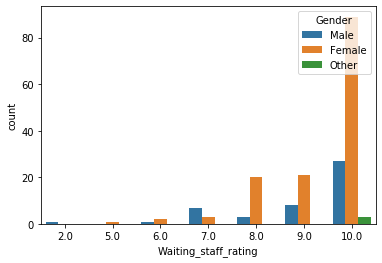

In [19]:
sns.countplot(x="Waiting_staff_rating", hue="Gender", data=dataset);

In [20]:
dataset.corr()

,Age,Cocktails_rating,Food_rating,Shisha_rating,Waiting_staff_rating,Environment_rating
Age,1.000000,0.090780,-0.025387,0.023340,-0.157480,-0.148020
Cocktails_rating,0.090780,1.000000,0.394640,0.261444,0.339141,0.308018
Food_rating,-0.025387,0.394640,1.000000,0.454152,0.292474,0.450034
Shisha_rating,0.023340,0.261444,0.454152,1.000000,0.254563,0.271153
Waiting_staff_rating,-0.157480,0.339141,0.292474,0.254563,1.000000,0.578029
Environment_rating,-0.148020,0.308018,0.450034,0.271153,0.578029,1.000000


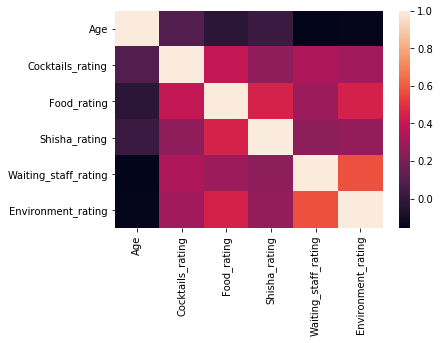

In [21]:
sns.heatmap(dataset.corr());

In [22]:
test_mapped = dataset.copy()
test_mapped['Gender']= test_mapped['Gender'].map({'Female':0, 'Male':1})
test_mapped['Location']= test_mapped['Location'].map({'North London':0, 'No':1,'West London':2,'East London':3,'South London':4})
test_mapped['Education']= test_mapped['Education'].map({'Under-graduate':0,'Completed college':1, 'Post Graduate':3,'Graduate':2})
test_mapped['Social_media']= test_mapped['Social_media'].map({'':0,'Word of mouth':1,'Walking past':2,'Instagram':3,'Tik Tok':4})
test_mapped['Out_shishsa']=test_mapped['Out_shishsa'].map({'Never':0,'Daily':1,'Weekly':1,'Monthly':2,'Not often':2})
test_mapped['Out_food']=test_mapped['Out_food'].map({'Daily':0,'Weekly':0,'Monthly':1,})
test_mapped['Pinq_visit']=test_mapped['Pinq_visit'].map({'First time':0,'Almost Everyday':1,'Once a week':1,'Once a month':2,'Once every three months':2 })
test_mapped['Tried_cocktail']=test_mapped['Tried_cocktails'].map({'No':0,'Yes':1})
test_mapped['Dine_in']=test_mapped['Dine_in'].map({'No':0,'Yes':1})
test_mapped['Shisha_tried']=test_mapped['Shisha_tried'].map({'No':0,'Yes':1})
test_mapped_cluster = test_mapped.replace(np.nan, 0)

pd.options.display.max_columns = None

In [23]:
dataset.head(1)

,Timestamps,Name,email,Age,Mobile_number,Gender,Location,Income,Education,Social_media,...,Favourite_cocktail,Cocktails_rating,Dine_in,Food_rating,Shisha_tried,Shisha_rating,Waiting_staff_rating,Environment_rating,4_words,Recommendations
0,2022/06/07 8:41:39 PM GMT+1,Alessandro,NaN,20.0,NaN,Male,North London,5000-25000 GBP,Under-graduate,Tik Tok,...,Amaretti Sour,7.0,No,8.193548,No,6.0,7.0,8,A pretty decent restaurant,Great food


In [24]:
test_mapped_cluster.head(5)

,Timestamps,Name,email,Age,Mobile_number,Gender,Location,Income,Education,Social_media,...,Cocktails_rating,Dine_in,Food_rating,Shisha_tried,Shisha_rating,Waiting_staff_rating,Environment_rating,4_words,Recommendations,Tried_cocktail
0,2022/06/07 8:41:39 PM GMT+1,Alessandro,0,20.0,0,1.0,0,5000-25000 GBP,0.0,4.0,...,7.0,0,8.193548,0,6.0,7.0,8,A pretty decent restaurant,Great food,1
1,2022/06/07 8:42:37 PM GMT+1,Semih,0,19.0,0,1.0,0,5000-25000 GBP,0.0,4.0,...,0.0,0,8.193548,0,7.0,8.0,8,Tasty restaurant,0,1
2,2022/06/07 8:43:33 PM GMT+1,Robert,0,20.0,0,1.0,2,5000-25000 GBP,0.0,0.0,...,8.0,1,7.000000,0,7.0,8.0,8,Good,Yes,1
3,2022/06/07 8:43:44 PM GMT+1,Sebastian,0,20.0,0,1.0,0,5000-25000 GBP,0.0,1.0,...,8.0,1,9.000000,0,5.0,10.0,9,"Clean, great food, good environment",0,0
4,2022/06/07 8:47:05 PM GMT+1,Hidaya Jordan,0,21.0,0,0.0,2,25000-45000 GBP,0.0,3.0,...,10.0,1,10.000000,1,10.0,10.0,10,0,0,1


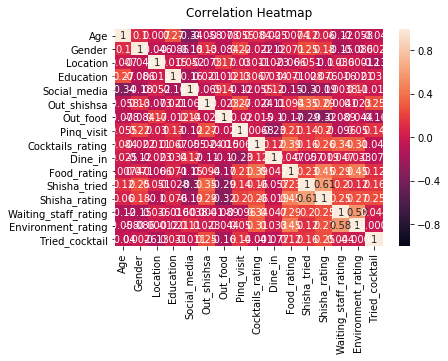

<Figure size 1152x1872 with 0 Axes>

In [25]:
heatmap = sns.heatmap(test_mapped_cluster.corr(), vmin=-1, vmax=1, annot=True)
plt.figure(figsize=(16, 26))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

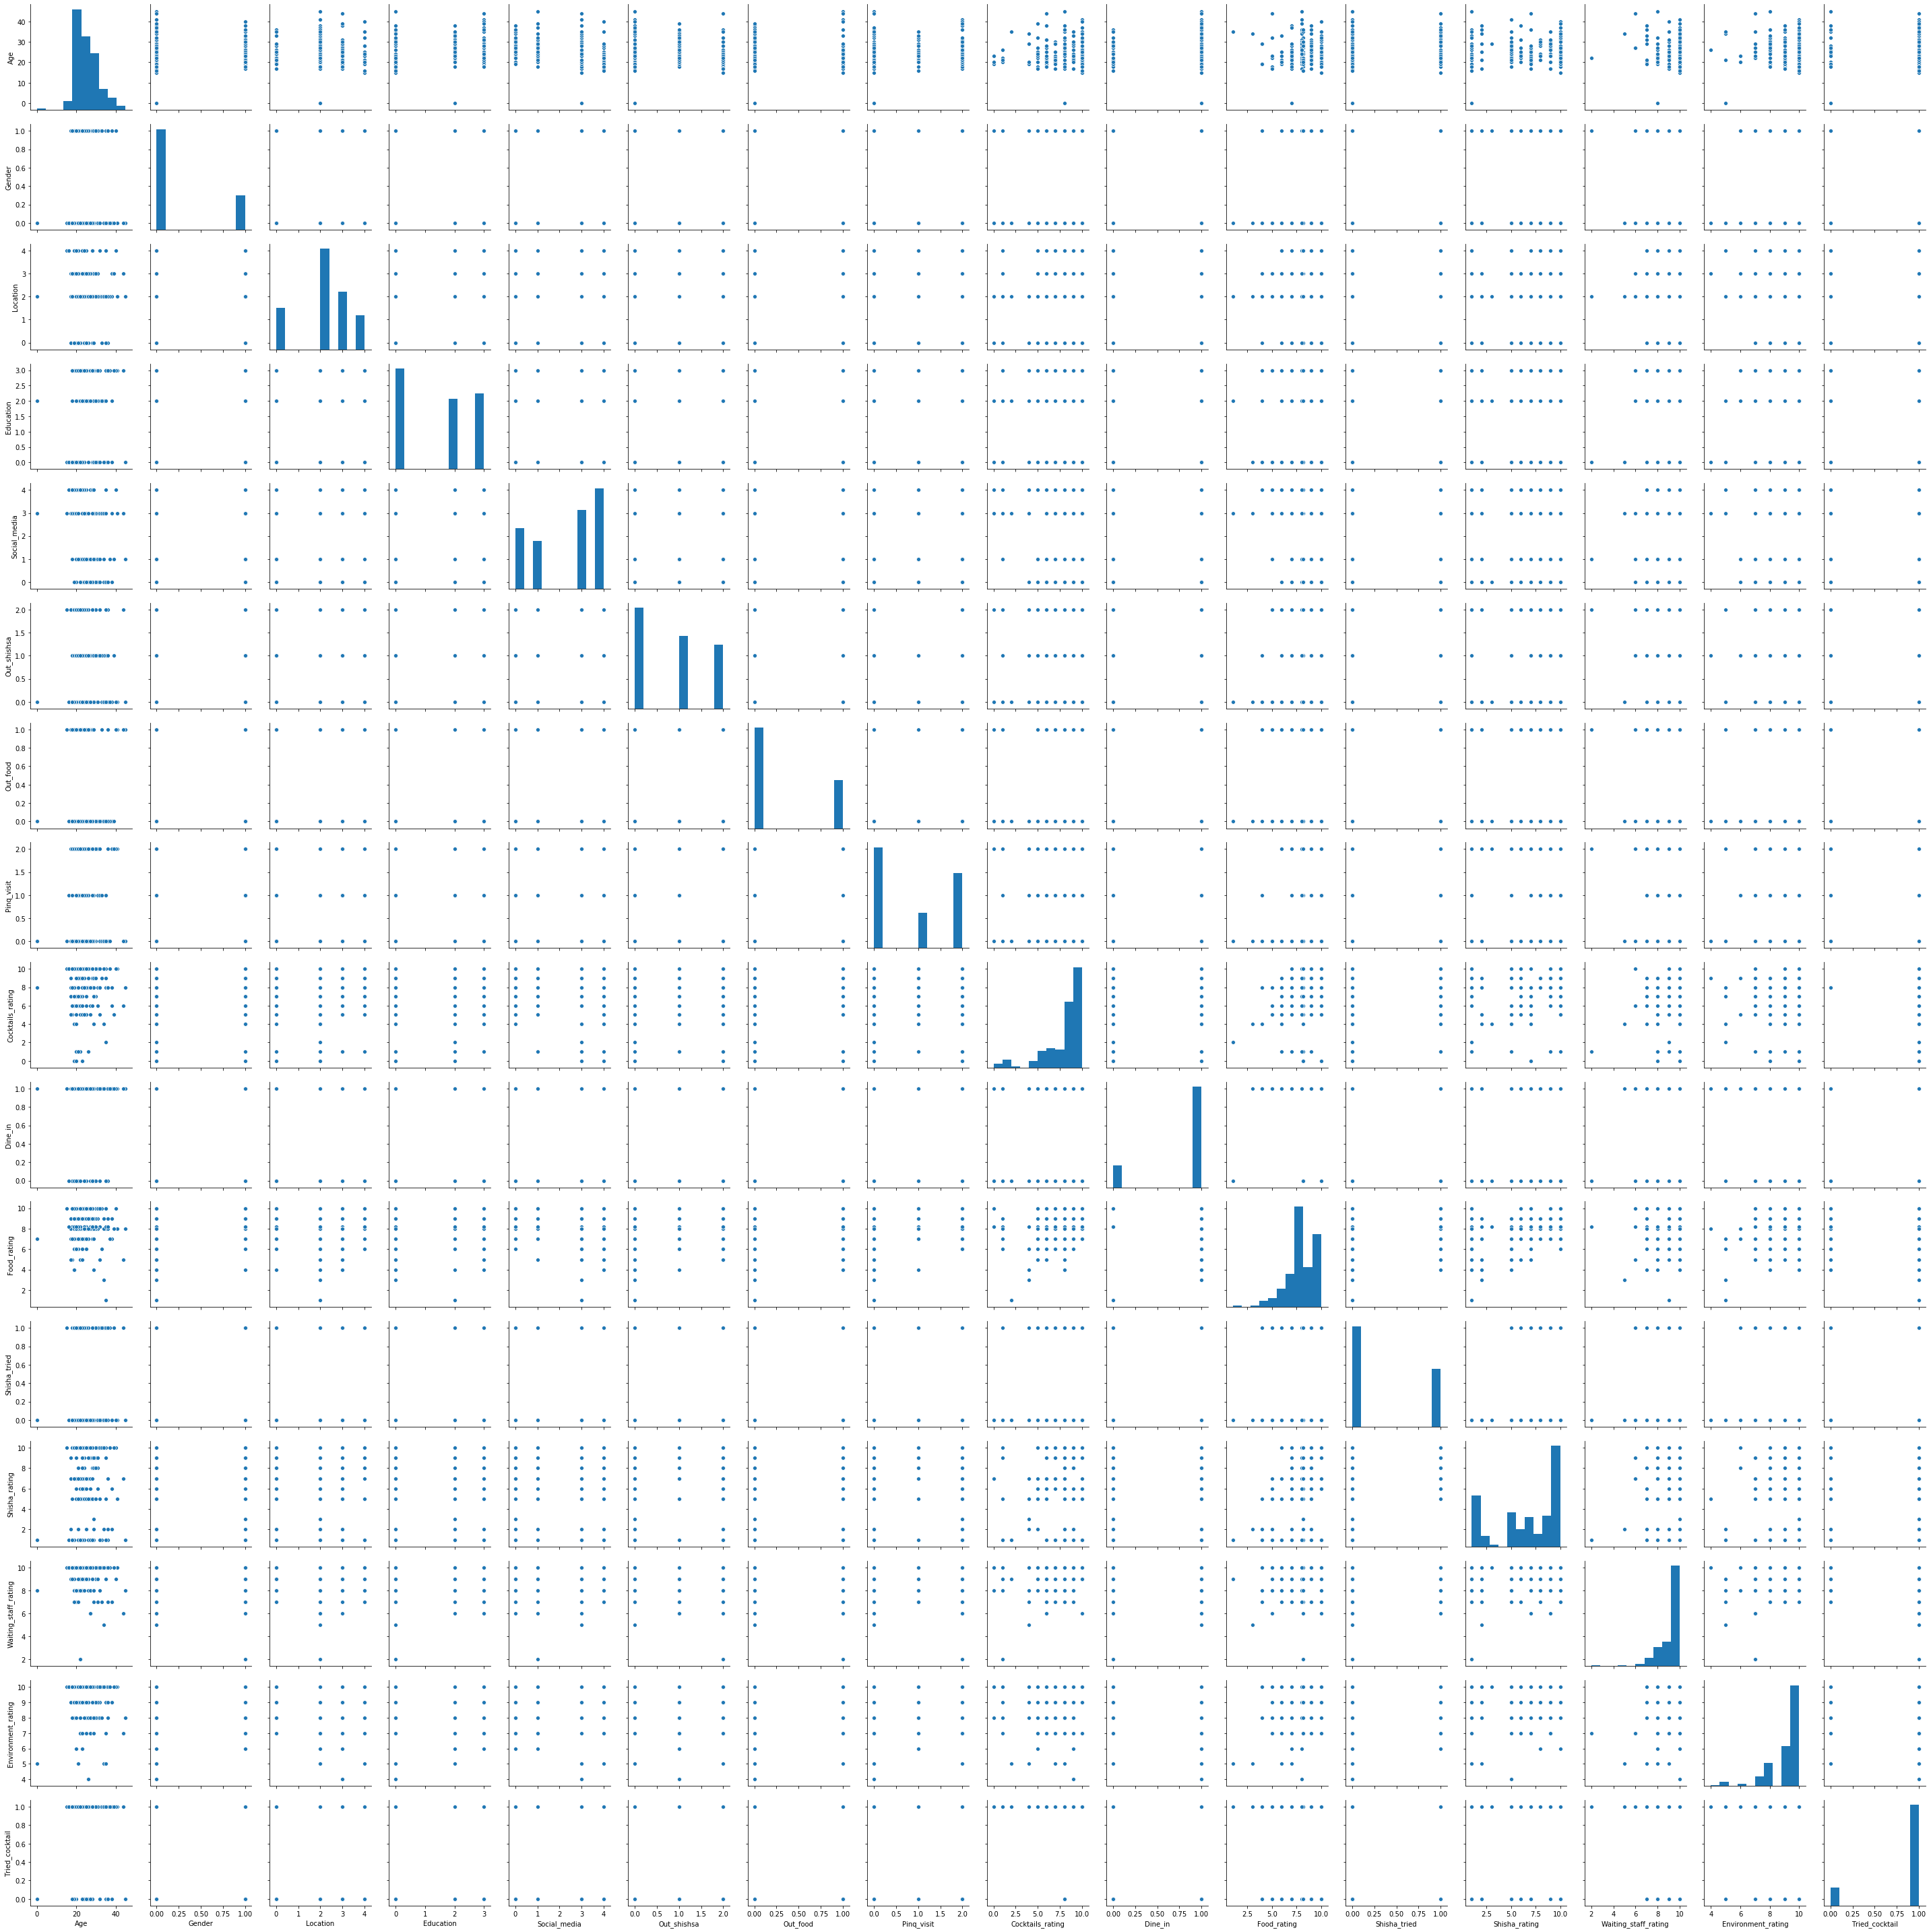

In [26]:
sns.pairplot(test_mapped_cluster)

In [27]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter
import statsmodels.api as sm

In [28]:
#####df[col] = df[col].astype('int64')
test_mapped_cluster['Gender']=test_mapped_cluster['Gender'].astype('int64')
test_mapped_cluster['Social_media']=test_mapped_cluster['Social_media'].astype('int64')
test_mapped_cluster['Pinq_visit']=test_mapped_cluster['Pinq_visit'].astype('int64')

In [29]:
enroll=test_mapped_cluster.copy()

In [30]:
enroll_data=enroll.iloc[:,(9)].values
enroll_target=enroll.iloc[:,14].values

enroll_data_names=['Social_media']
X,y=scale(enroll_data),enroll_target

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [31]:
y = test_mapped_cluster[["Social_media","Gender"]]
X = test_mapped_cluster[["Pinq_visit"]]

In [32]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
X = test_mapped_cluster[["Social_media","Gender"]]
y = test_mapped_cluster[["Pinq_visit"]]
X = sm.add_constant(X)
model11 = sm.OLS(y, X).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Pinq_visit   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     5.243
Date:                Tue, 18 Oct 2022   Prob (F-statistic):            0.00611
Time:                        21:38:17   Log-Likelihood:                -240.06
No. Observations:                 186   AIC:                             486.1
Df Residuals:                     183   BIC:                             495.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8898      0.130      6.838      0.000       0.633       1.147
Social_media    -0.0498      0.042     -1.198      0.232      -0.132       0.032
Gender           0.4173      0.152      2.743      0.007       0.117       0.717
==============================================================================
Omnibus:                     5529.001   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.872
Skew:                           0.320   Prob(JB):                     2.94e-05
Kurtosis:                       1.489   Cond. No.                         7.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""